# Présentation de l'optimizer ADAM

## Adam Adaptive Moment Estimation

Adam optimizer est la version étendue de la descente de gradient stochastique qui pourrait être implémentée dans diverses applications d’apprentissage profond telles que la vision par ordinateur et le traitement du langage naturel. Adam a été présenté pour la première fois en 2014. Il a été présenté pour la première fois lors d’une célèbre conférence pour les chercheurs en apprentissage profond appelée ICLR 2015. 

L’optimiseur est appelé Adam car il utilise des estimations des premier et deuxième moments du gradient pour adapter le taux d’apprentissage à chaque poids du réseau neuronal.

Avant Adam, de nombreuses techniques d’optimisation adaptative ont été introduites telles que AdaGrad, RMSP qui ont de bonnes performances par rapport à SGD mais dans certains cas présentent certains inconvénients tels que la généralisation des performances qui sont pires que celles du SGD dans certains cas. Donc, Adam a été introduit, ce qui est mieux en termes de généralisation de la performance. 

Toujours dans Adam, les hyperparamètres ont des interprétations intuitives et nécessitent donc moins d’accordage. 

Adam performe bien. Mais dans certains cas, les chercheurs ont observé qu’Adam ne converge pas vers la solution optimale, l’optimiseur SGD le fait à la place. Dans un ensemble diversifié de tâches d’apprentissage en profondeur, les optimiseurs Adam ont parfois de faibles performances de généralisation. Selon l’auteur Nitish Shirish Keskar et Richard Socher, le passage à SGD dans certains cas montre une meilleure performance de généralisation qu’Adam seul

## Fonctionnement

Adam utilise une combinaison de techniques pour trouver la meilleure configuration de poids :

- Tout d'abord, Adam maintient un taux d'apprentissage adaptatif pour chaque poids. Cela signifie qu'il ajuste automatiquement la taille des pas pour mettre à jour chaque poids. Certains poids peuvent nécessiter de plus petits pas, tandis que d'autres peuvent nécessiter de plus grands pas.

- Adam utilise des estimations du premier et du second moment des gradients pour ajuster les taux d'apprentissage. Les gradients représentent les indications sur la direction dans laquelle vous devez ajuster les poids. Les estimations du premier moment indiquent comment les gradients changent au fil du temps, tandis que les estimations du second moment indiquent à quel point les gradients varient.

- En utilisant ces estimations, Adam effectue des mises à jour des poids en ajustant les taux d'apprentissage pour chaque poids individuel. Cela permet de prendre en compte la nature spécifique de chaque poids lors de la mise à jour.

L'avantage d'Adam est qu'il permet une convergence plus rapide de l'entraînement du modèle. Il est efficace pour les problèmes avec des données de grande dimension ou des fonctions coûts complexes.

En résumé, l'optimiseur Adam est un algorithme qui permet d'ajuster les poids d'un modèle de manière intelligente en utilisant des taux d'apprentissage adaptatifs et des estimations des gradients. Cela permet de trouver plus rapidement la meilleure configuration de poids pour un modèle d'apprentissage automatique.



### Essaie d'utilisation de Adam sur le dataset Breast_Cancer

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [155]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [156]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [157]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [158]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [159]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1 --> Benign

0 --> Malignant

In [160]:
# Separating data

X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [161]:
# Spliting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [163]:
# importing tensorflow and Keras
import tensorflow as tf 
from tensorflow import keras

In [164]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [165]:
# setting up the layers of Neural Network

# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [166]:
model.fit(X_train_std, Y_train, validation_split=0.1, epochs=50)

Epoch 1/50
13/13 [==============================] - 1s 22ms/step - loss: 0.6108 - accuracy: 0.6308 - val_loss: 0.4684 - val_accuracy: 0.7826
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4457 - accuracy: 0.8215 - val_loss: 0.3408 - val_accuracy: 0.9783
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 0.3463 - accuracy: 0.8900 - val_loss: 0.2638 - val_accuracy: 0.9783
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.2815 - accuracy: 0.9218 - val_loss: 0.2116 - val_accuracy: 0.9783
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.2333 - accuracy: 0.9364 - val_loss: 0.1768 - val_accuracy: 0.9783
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1995 - accuracy: 0.9462 - val_loss: 0.1530 - val_accuracy: 0.9783
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1750 - accuracy: 0.9511 - val_loss: 0.1363 - val_accuracy: 0.9783
Epoch 8/50
13/13 [=

In [167]:
loss_adam, accuracy_adam = model.evaluate(X_test_std, Y_test)
print("Accuracy : ", accuracy_adam)
print("Loss : ", loss_adam)


4/4 [==============================] - 0s 3ms/step - loss: 0.1056 - accuracy: 0.9649
Accuracy :  0.9649122953414917
Loss :  0.10563753545284271


# Comparaison Avec SGD

In [170]:

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [171]:
model.fit(X_train_std, Y_train, validation_split=0.1, epochs=50)

Epoch 1/50
13/13 [==============================] - 1s 20ms/step - loss: 0.0368 - accuracy: 0.9902 - val_loss: 0.0703 - val_accuracy: 0.9783
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0368 - accuracy: 0.9902 - val_loss: 0.0702 - val_accuracy: 0.9783
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.9902 - val_loss: 0.0703 - val_accuracy: 0.9783
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0367 - accuracy: 0.9902 - val_loss: 0.0702 - val_accuracy: 0.9783
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0366 - accuracy: 0.9902 - val_loss: 0.0702 - val_accuracy: 0.9783
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0365 - accuracy: 0.9902 - val_loss: 0.0702 - val_accuracy: 0.9783
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0365 - accuracy: 0.9902 - val_loss: 0.0702 - val_accuracy: 0.9783
Epoch 8/50
13/13 [=

In [172]:
loss_sgd, accuracy_sgd = model.evaluate(X_test_std, Y_test)
print("Accuracy : ", accuracy_sgd)
print("Loss : ", loss_sgd)


4/4 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9649
Accuracy :  0.9649122953414917
Loss :  0.1078246459364891


# Comparaison Avec rmsprop
    

In [173]:

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_std, Y_train, validation_split=0.1, epochs=50)

Epoch 1/50


13/13 [==============================] - 1s 20ms/step - loss: 0.0360 - accuracy: 0.9927 - val_loss: 0.0716 - val_accuracy: 0.9783
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.9927 - val_loss: 0.0713 - val_accuracy: 0.9783
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.9927 - val_loss: 0.0719 - val_accuracy: 0.9783
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.9927 - val_loss: 0.0703 - val_accuracy: 0.9783
Epoch 5/50
13/13 [==============================] - 0s 20ms/step - loss: 0.0318 - accuracy: 0.9927 - val_loss: 0.0703 - val_accuracy: 0.9783
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0316 - accuracy: 0.9927 - val_loss: 0.0706 - val_accuracy: 0.9783
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0308 - accuracy: 0.9927 - val_loss: 0.0704 - val_accuracy: 0.9783
Epoch 8/50
13/13 [===========

In [174]:
loss_rms, accuracy_rms = model.evaluate(X_test_std, Y_test)
print("Accuracy : ", accuracy_rms)
print("Loss : ", loss_rms)

4/4 [==============================] - 0s 2ms/step - loss: 0.1503 - accuracy: 0.9649
Accuracy :  0.9649122953414917
Loss :  0.150255486369133


# ADAGRAD

In [175]:
model.compile(optimizer='adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_std, Y_train, validation_split=0.1, epochs=50)

Epoch 1/50


13/13 [==============================] - 1s 19ms/step - loss: 0.0109 - accuracy: 0.9951 - val_loss: 0.0788 - val_accuracy: 0.9565
Epoch 2/50
13/13 [==============================] - 0s 15ms/step - loss: 0.0109 - accuracy: 0.9951 - val_loss: 0.0788 - val_accuracy: 0.9565
Epoch 3/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0109 - accuracy: 0.9951 - val_loss: 0.0788 - val_accuracy: 0.9565
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0109 - accuracy: 0.9951 - val_loss: 0.0787 - val_accuracy: 0.9565
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 0.9951 - val_loss: 0.0787 - val_accuracy: 0.9565
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 0.9951 - val_loss: 0.0787 - val_accuracy: 0.9565
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 0.9951 - val_loss: 0.0786 - val_accuracy: 0.9565
Epoch 8/50
13/13 [===========

In [176]:
loss_agrad, accuracy_agrad = model.evaluate(X_test_std, Y_test)
print("Accuracy : ", accuracy_agrad)
print("Loss : ", loss_agrad)

4/4 [==============================] - 0s 4ms/step - loss: 0.1527 - accuracy: 0.9649
Accuracy :  0.9649122953414917
Loss :  0.15267443656921387


# ADELTA

In [178]:
model.compile(optimizer='adadelta',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_std, Y_train, validation_split=0.1, epochs=50)

Epoch 1/50


13/13 [==============================] - 1s 20ms/step - loss: 0.0106 - accuracy: 0.9951 - val_loss: 0.0779 - val_accuracy: 0.9565
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0106 - accuracy: 0.9951 - val_loss: 0.0779 - val_accuracy: 0.9565
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0106 - accuracy: 0.9951 - val_loss: 0.0779 - val_accuracy: 0.9565
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0106 - accuracy: 0.9951 - val_loss: 0.0779 - val_accuracy: 0.9565
Epoch 5/50
13/13 [==============================] - 0s 10ms/step - loss: 0.0106 - accuracy: 0.9951 - val_loss: 0.0779 - val_accuracy: 0.9565
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0106 - accuracy: 0.9951 - val_loss: 0.0779 - val_accuracy: 0.9565
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0106 - accuracy: 0.9951 - val_loss: 0.0779 - val_accuracy: 0.9565
Epoch 8/50
13/13 [===========

In [179]:
loss_adelta, accuracy_adelta = model.evaluate(X_test_std, Y_test)
print("Accuracy : ", accuracy_adelta)
print("Loss : ", loss_adelta)

1/4 [======>.......................] - ETA: 0s - loss: 0.0235 - accuracy: 1.0000

4/4 [==============================] - 0s 3ms/step - loss: 0.1528 - accuracy: 0.9649
Accuracy :  0.9649122953414917
Loss :  0.15276972949504852


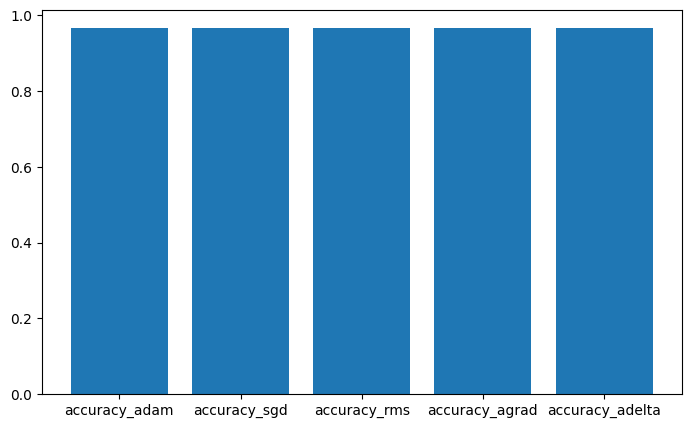

In [181]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([1,0,1,0.80])
algo=['accuracy_adam','accuracy_sgd','accuracy_rms','accuracy_agrad','accuracy_adelta', ]
valeurs = [accuracy_adam,accuracy_sgd,accuracy_rms,accuracy_agrad,accuracy_adelta]
ax.bar(algo,valeurs)
plt.show()

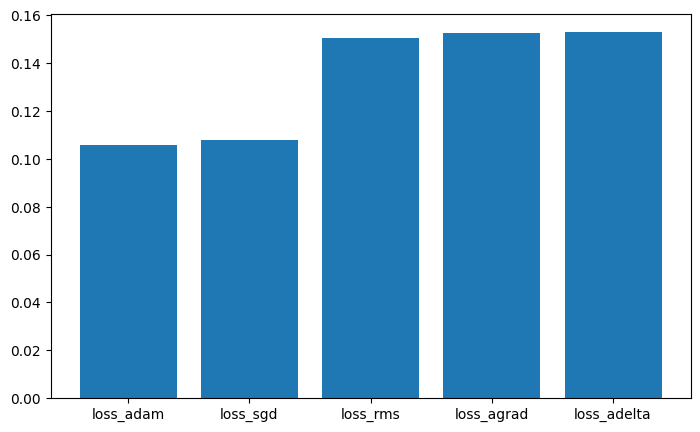

In [182]:
fig = plt.figure()
ax = fig.add_axes([1,0,1,0.80])
algo=['loss_adam','loss_sgd','loss_rms','loss_agrad','loss_adelta', ]
valeurs = [loss_adam,loss_sgd,loss_rms,loss_agrad,loss_adelta]
ax.bar(algo,valeurs)
plt.show()